<a href="https://colab.research.google.com/github/shobhittya/deeplearning/blob/main/MesoNet_Deepfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras import regularizers
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau

In [2]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [7]:
dataset_url = "https://www.kaggle.com/xhlulu/140k-real-and-fake-faces"

In [8]:
import os

In [9]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shobhittyagi
Your Kaggle Key: ··········


100%|██████████| 3.75G/3.75G [01:10<00:00, 57.4MB/s]


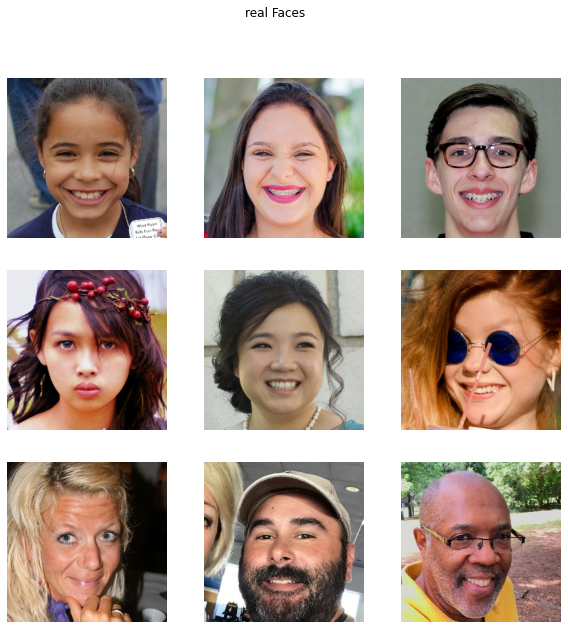

In [13]:
path = '/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'

def plot_img(path, set_):
    dir_ = os.path.join(path, 'train', set_)
    k = 0
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    fig.suptitle(set_ + 'Faces')
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))          
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

plot_img(path, 'real').show()

In [18]:
bs = 64
row, col = 224, 224
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True
                                  )
training_set = train_datagen.flow_from_directory(path + '/train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(path + '/valid',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(row,col),
                                                      batch_size=bs
                                                     ) 
test_set = val_test_datagen.flow_from_directory(path + '/test',
                                                class_mode='binary',
                                                shuffle=True,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
training_set.class_indices

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [57]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (224,224,3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(2, activation='softmax')
     ]
)


In [58]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot


In [59]:
tf.keras.utils.pydot = pydot

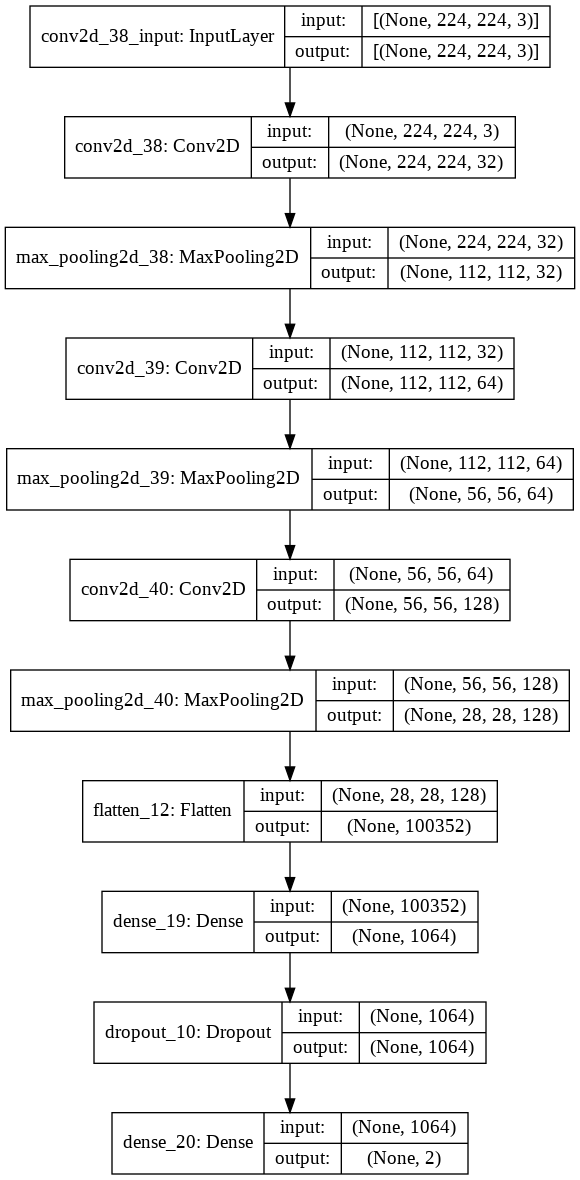

In [60]:
plot_model(model, to_file='model.png', show_shapes=True)

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 100352)           

In [62]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [63]:
%%time
history = model.fit(training_set, validation_data = validation_set, epochs = 5, validation_steps = 100, verbose=1)

Epoch 1/5
1563/1563 [==============================] - 309s 196ms/step - loss: 0.5297 - accuracy: 0.7448 - val_loss: 0.3854 - val_accuracy: 0.8275
Epoch 2/5
1563/1563 [==============================] - 285s 182ms/step - loss: 0.3231 - accuracy: 0.8603 - val_loss: 0.3226 - val_accuracy: 0.8594
Epoch 3/5
1563/1563 [==============================] - 285s 182ms/step - loss: 0.2298 - accuracy: 0.9061 - val_loss: 0.2132 - val_accuracy: 0.9128
Epoch 4/5
1563/1563 [==============================] - 285s 182ms/step - loss: 0.1618 - accuracy: 0.9365 - val_loss: 0.1707 - val_accuracy: 0.9345
Epoch 5/5
1563/1563 [==============================] - 281s 180ms/step - loss: 0.1212 - accuracy: 0.9541 - val_loss: 0.1623 - val_accuracy: 0.9406
CPU times: user 34min 15s, sys: 1min 8s, total: 35min 23s
Wall time: 24min 5s


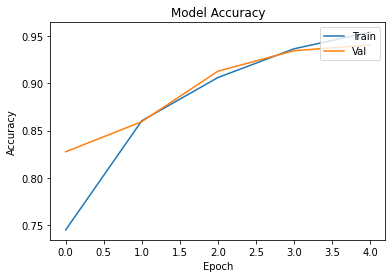

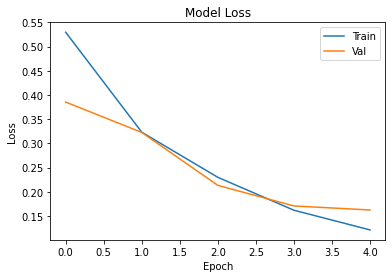

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [68]:
test_loss, test_acc = model.evaluate(test_set)

313/313 [==============================] - 55s 177ms/step - loss: 0.1686 - accuracy: 0.9367
